In [10]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

from glob import glob
from scipy.stats import norm
from time import time
import matplotlib.pyplot as plt

Load data

In [13]:
data = []
for file in glob('results/*.pkl'):
    try:
        data.append(pd.read_pickle(file))
    except:
        print(f"Error reading {file}")
        
data = pd.concat(data, ignore_index=True, sort=False)

In [23]:
data.shape

(33300, 7)

In [16]:
data.head()

,T,avg_estimate,avg_student,ipw_estimate,ipw_student,aw_estimate,aw_student
0,1000000,-0.000616,-0.336799,0.000495,0.202088,-0.000143,-0.073113
1,1000000,0.001090,0.910359,0.001192,0.955063,0.001140,0.942832
2,1000000,0.001356,1.133476,0.000917,0.734318,0.001141,0.943430
3,1000000,0.001260,1.054122,0.001478,1.186885,0.001368,1.133573
4,1000000,0.001261,1.054567,0.001181,0.946454,0.001222,1.011068


Plot config

In [21]:
sns.set(style='ticks')
sns.set_context('paper', font_scale=1.5)
xs = np.linspace(-4, 4, 100)

### Plotting studentized statistics

Including IPW, sample mean and adaptively-weighted (constant alloc).

In [33]:
data[column].unique()

array([-0.0731127 ,  0.94283236,  0.94342965,  1.13357264,  1.01106809,
        0.02191784, -0.38741179, -2.00664256, -0.19655912, -0.50707183,
       -2.06051366, -1.23790549, -0.88190516, -0.16180856,  0.93651145,
       -0.14065545, -0.37502865, -2.15214547, -0.39316233,  0.91635422,
        0.3483583 ,  0.99980195, -1.47739766,  0.0803432 , -0.00260288,
       -2.05787107,  0.95404761, -1.42859756, -0.08438036, -0.45216874,
        1.1572009 , -1.06581256, -0.07878833, -0.00652606, -0.4057948 ,
        0.22709684, -1.33509413, -1.35041031, -0.73993948,  0.93618976,
        0.55955289, -1.19941673, -0.56850523, -0.20098529, -0.88077936,
        0.37469756, -1.27746987, -0.71821824, -1.29087423, -0.17682059,
        0.53501206,  0.28090466,  0.03287993, -0.37434009, -0.57646458,
       -0.31993547,  1.8858059 , -0.72670436,  0.78213282,  0.21953108,
        0.16255041, -1.20539713,  1.58362179,  0.63430946,  0.32886678,
        0.81075822,  0.49127496,  0.13198729,  1.13946275,  0.47

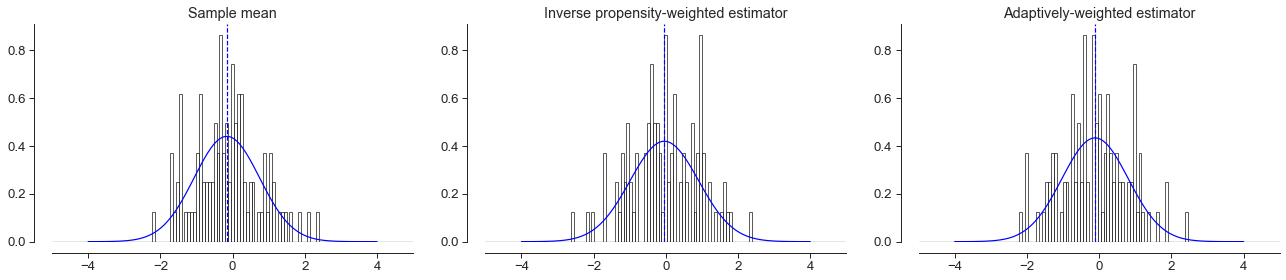

In [29]:
columns = ['avg_student', 'ipw_student', 'aw_student']
titles = ['Sample mean', 'Inverse propensity-weighted estimator', 'Adaptively-weighted estimator']

fig, axs = plt.subplots(1, 3, figsize=(22, 4),  dpi=72, facecolor="white")

for ax, column, title in zip(axs, columns, titles):
    
    y = data[column].values
    ax.hist(y, bins=xs, density=True, alpha=.8, facecolor='white', edgecolor='black');
    ax.plot(xs, norm(y.mean(), y.std()).pdf(xs), color='blue', linestyle='-')
    ax.axvline(np.mean(y), color="blue", linestyle="--")
    ax.set_title(title)

    # styling
    ax.spines['bottom'].set_position(('axes', -0.05))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('axes', -0.05))
    ax.axhline(0, color='black')
    ax.set_xlim(-5, 5)
    
sns.despine()


fig.savefig('../figures/intro_example_revisited.pdf')

### Plotting scaled error: $\sqrt{T} \cdot (\widehat{Q}_T - 0)$

The first two plots here are what we have in the introduction. 

In [3]:
sns.set(style='ticks')
sns.set_context('paper', font_scale=1.5)

xs = np.linspace(-5, 5, 100)
bins = 200

scaled_errors = [np.sqrt(T) * avg_estimate, np.sqrt(T) * ipw_estimate, np.sqrt(T) * aw_estimate] 
titles = ['Sample mean', 'Inverse propensity-weighted estimator', 'Adaptively-weighted estimator']

fig, axs = plt.subplots(1, 3, figsize=(18, 4),  dpi=72, facecolor="white")

for ax, scaled, title in zip(axs, scaled_errors, titles):
    
    ax.hist(scaled, bins=xs, density=True, alpha=.8, facecolor='white', edgecolor='black');
    ax.plot(xs, norm(scaled.mean(), scaled.std()).pdf(xs), color='blue', linestyle='-')
    ax.axvline(np.mean(scaled), color="blue", linestyle="--")
    ax.set_title(title)

    # styling
    ax.spines['bottom'].set_position(('axes', -0.05))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('axes', -0.05))
    ax.axhline(0, color='black')
    ax.set_xlim(-5, 5)
    
sns.despine()


fig.savefig('figures/intro_example_scaled.pdf')

NameError: name 'sns' is not defined